In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
%cd ../..

/nfs/homedirs/fuchsgru


In [3]:
%pwd

'/nfs/homedirs/fuchsgru'

In [4]:
p = np.array([
    [0.5, 0.01, 0.03, 0.05, 0.01, 0.01],
    [0.01, 0.6,  0.02, 0.01, 0.01, 0.01],
    [0.03, 0.02, 0.55, 0.01, 0.01, 0.01],
    [0.05, 0.01, 0.01, 0.6, 0.01, 0.01],
    [0.01, 0.01, 0.01, 0.01, 0.5, 0.01],
    [0.01, 0.01, 0.01, 0.01, 0.01, 0.5],
])

G = nx.generators.community.stochastic_block_model([20, 15, 10, 15, 15, 15], p)

In [5]:
partitions = G.graph['partition']

In [6]:
np.random.seed(44)
pos = nx.drawing.layout.spring_layout(G, k=None)

In [7]:
nodes_non_loc = [v for v in G.nodes if not v in partitions[-1] and not v in partitions[-2]]
edges_non_loc = [(u, v) for u, v in G.edges if u in nodes_non_loc and v in nodes_non_loc]


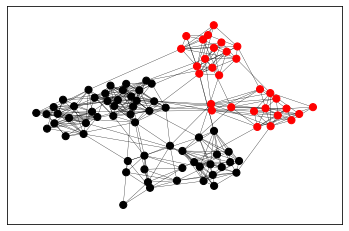

In [8]:
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=['black' if v in nodes_non_loc else 'red' for v in G.nodes],
                width=.3,
                node_size=50,)

In [9]:
fig.savefig('ood-loc-os.pdf', bbox_inches='tight')

In [10]:
np.random.seed(1341)
is_perturbed = np.random.rand(len(nodes_non_loc)) < 0.2
is_perturbed

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False])

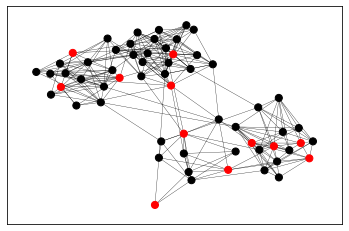

In [11]:
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=['black' if not is_perturbed[v] else 'red' for v in nodes_non_loc],
                width=.3,
                node_size=50,
                nodelist=nodes_non_loc,
                edgelist=edges_non_loc)

In [12]:
fig.savefig('ood-per.pdf', bbox_inches='tight')

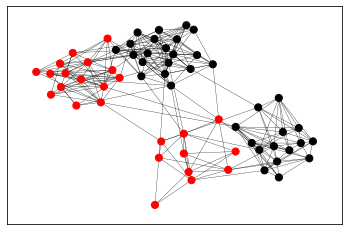

In [13]:
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=['black' if v not in partitions[-4] and not v in partitions[-3] else 'red' for v in nodes_non_loc],
                width=.3,
                node_size=50,
                nodelist=nodes_non_loc,
                edgelist=edges_non_loc)

In [14]:
fig.savefig('ood-loc.pdf', bbox_inches='tight')

In [15]:
nodes_non_loc = [v for v in G.nodes if not v in partitions[-1] and not v partitions[-2]]

SyntaxError: invalid syntax (<ipython-input-15-860a2cc5afc5>, line 1)